In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
def pairwise_distances(points):
    num_points = len(points)
    dist_matrix = np.zeros((num_points, num_points))

    for i in range(num_points):
        for j in range(num_points):
            dist_matrix[i, j] = np.linalg.norm(points[i] - points[j])

    return dist_matrix

## Algorytm Greedy Nearest

97


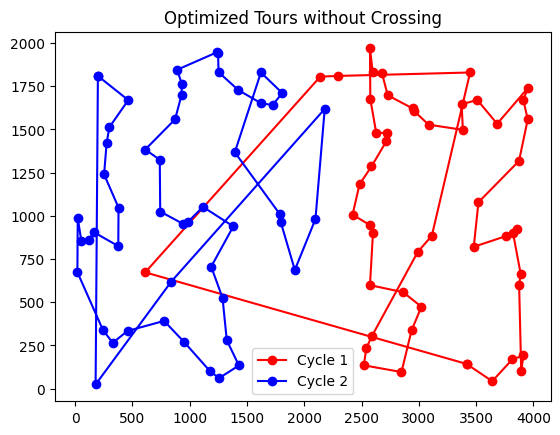

In [175]:
def create_alternate_cycles(cities):
    n = cities.shape[0]
    unvisited = list(range(n))
    
    # Randomly choose the starting point for the first cycle
    tour1 = [unvisited.pop(np.random.randint(0, len(unvisited)))]
    start_city_1 = unvisited[tour1[0]]

    # Choose the furthest city from the starting point as the initial point for the second cycle
    start_city_2_idx = np.argmax([cities[tour1[0]][i] for i in unvisited])
    print(start_city_2_idx)
    tour2 = [unvisited.pop(start_city_2_idx)]
    start_city_2 = unvisited[start_city_2_idx]
    
    while unvisited:
        current_city = tour1[-1]

        # Calculate distances to unvisited cities
        distances1 = [cities[current_city][j] for j in unvisited]
        closest_city1 = unvisited.pop(np.argmin(distances1))
        tour1.append(closest_city1)
    
        if unvisited:
            current_city = tour2[-1]

            # Calculate distances to unvisited cities
            distances2 = [cities[current_city][j] for j in unvisited]
            closest_city2 = unvisited.pop(np.argmin(distances2))
            tour2.append(closest_city2)

    return tour1, tour2

def plot_optimized_tours(positions, cycle1, cycle2):
    # Ensure the cycles start and end at the same city to form closed loops
    cycle1.append(cycle1[0])
    cycle2.append(cycle2[0])

    # Plot the optimized tours
    plt.plot(positions[cycle1, 0], positions[cycle1, 1], linestyle='-', marker='o', color='r', label='Cycle 1')
    plt.plot(positions[cycle2, 0], positions[cycle2, 1], linestyle='-', marker='o', color='b', label='Cycle 2')

    # Add legend and title
    plt.legend()
    plt.title('Optimized Tours without Crossing')
    plt.show()

# Load data from CSV file
data = pd.read_csv('kroa.csv', sep=' ')
positions = np.array([data['x'], data['y']]).T

# Create two separate cycles without lines crossing
distance_matrix = pairwise_distances(positions)

cycle1, cycle2 = create_alternate_cycles(distance_matrix)

# Plot the optimized tours
plot_optimized_tours(positions, cycle1, cycle2)

## Algorytm Greedy

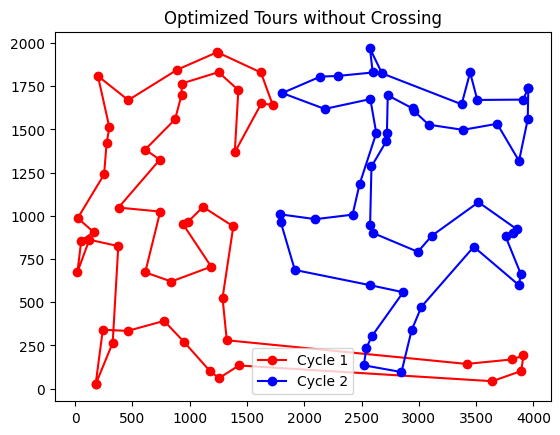

In [42]:

np.random.seed(11)

# def calculate_distance(city1, city2):
#     return np.round(np.linalg.norm(city1 - city2))

def plot_current_tours_to_file(positions, tour1, tour2,unvisited):
    # Ensure the cycles start and end at the same city to form closed loops
    cycle1 = tour1.copy()
    cycle2 = tour2.copy()
    cycle1.append(cycle1[0])
    cycle2.append(cycle2[0])

    # Plot the optimized tours
    plt.plot(positions[cycle1, 0], positions[cycle1, 1], linestyle='-', marker='o', color='r', label='Cycle 1')
    plt.plot(positions[cycle2, 0], positions[cycle2, 1], linestyle='-', marker='o', color='b', label='Cycle 2')
    plt.plot(positions[unvisited, 0], positions[unvisited, 1], linestyle=' ', marker='o', color='k', label='Unvisited')

    # Add legend and title
    plt.legend()
    plt.title('Optimized Tours without Crossing')
    #plt.savefig('results/step'+str(len(cycle1))+'.png')
    plt.show()
    plt.close()

def create_greedy_cycles(cities):
    n = cities.shape[0]
    unvisited = list(range(n))
    
    # Randomly choose the starting point for the first cycle
    tour1 = [unvisited.pop(np.random.randint(0, len(unvisited)))]
    start_city_1 = unvisited[tour1[0]]
    nearest_to_first_1 = [cities[tour1[0]][j] for j in unvisited]
    tour1.append(unvisited.pop(np.argmin(nearest_to_first_1)))

    # Choose the furthest city from the starting point as the initial point for the second cycle
    start_city_2_idx = np.argmax([cities[tour1[0]][i] for i in unvisited])
    tour2 = [unvisited.pop(start_city_2_idx)]
    start_city_2 = unvisited[start_city_2_idx]
    nearest_to_first_2 = [cities[tour2[0]][j] for j in unvisited]
    tour2.append(unvisited.pop(np.argmin(nearest_to_first_2)))

    # Add third point to both tours
    nearest_to_tour_1 = [cities[tour1[0]][j] + cities[tour1[1]][j] for j in unvisited]
    tour1.append(unvisited.pop(np.argmin(nearest_to_tour_1)))

    nearest_to_tour_2 = [cities[tour2[0]][j] + cities[tour2[1]][j] for j in unvisited]
    tour2.append(unvisited.pop(np.argmin(nearest_to_tour_2)))

    # Start adding points that are best fit for the graph
    while unvisited:
        #current_city = tour1[-1]
        positions = np.array([data['x'], data['y']]).T
        #plot_current_tours_to_file(positions, tour1, tour2, unvisited)
        # current_cycle_distance_1=[]
        # for x in range(len(tour1)-1):
        #     current_cycle_distance_1.append(calculate_distance(cities[tour1[x]], cities[tour1[x+1]]))
        # max_distance_1=np.sum(current_cycle_distance_1)

        # current_cycle_distance_2=[]
        # for x in range(len(tour2)-1):
        #     current_cycle_distance_2.append(calculate_distance(cities[tour2[x]], cities[tour2[x+1]]))
        # max_distance_2=np.sum(current_cycle_distance_2)

        # Find nearest point for every point in the tour, then pick the smallest one
        possible_points = []
        smallest_value = float('inf')
        best_point = -1
        for tour_point in tour1:
            nearest_points = [cities[tour_point][j] for j in unvisited]
            if min(nearest_points) < smallest_value:
                best_point = np.argmin(nearest_points)
                smallest_value = min(nearest_points)
                #print("best",unvisited[best_point],smallest_value)
        best_point = unvisited.pop(best_point)
        #print("best_point",best_point)

        # Find all distances between points
        tour_distances = []
        for i in range(len(tour1)):
            if i == len(tour1) - 1:
                tour_distances.append(cities[tour1[-1]][tour1[0]])
            else:
                tour_distances.append(cities[tour1[i]][tour1[i+1]])

        # find smallest increase in distance when adding new point
        best_index = -1
        best_distance = cities[best_point][tour1[0]] + cities[best_point][tour1[-1]] - cities[tour1[0]][tour1[-1]]

        for i in range(len(tour_distances)-1):
            if(cities[best_point][tour1[i]] + cities[best_point][tour1[i+1]] - cities[tour1[i]][tour1[i+1]] < best_distance):
                best_index = i + 1
                best_distance = cities[best_point][tour1[i]] + cities[best_point][tour1[i+1]] - cities[tour1[i]][tour1[i+1]]

        # add new point to the tour with smallest increase in path
        if(best_index == -1):
            tour1.append(best_point)
        else:
            tour1.insert(best_index,best_point)
        #####
        ##### TU SKOŃCZYŁEM    
        #####
    
        if unvisited:
            possible_points = []
            smallest_value = float('inf')
            best_point = -1
            for tour_point in tour2:
                nearest_points = [cities[tour_point][j] for j in unvisited]
                if min(nearest_points) < smallest_value:
                    best_point = np.argmin(nearest_points)
                    smallest_value = min(nearest_points)
                    #print("best",unvisited[best_point],smallest_value)
            best_point = unvisited.pop(best_point)
            #print("best_point",best_point)

            # Find all distances between points
            tour_distances = []
            for i in range(len(tour2)):
                if i == len(tour2) - 1:
                    tour_distances.append(cities[tour2[-1]][tour2[0]])
                else:
                    tour_distances.append(cities[tour2[i]][tour2[i+1]])

            # find smallest increase in distance when adding new point
            best_index = -1
            best_distance = cities[best_point][tour2[0]] + cities[best_point][tour2[-1]] - cities[tour2[0]][tour2[-1]]

            for i in range(len(tour_distances) - 1):
                if(cities[best_point][tour2[i]] + cities[best_point][tour2[i+1]] - tour_distances[i] < best_distance):
                    best_index = i + 1
                    best_distance = cities[best_point][tour2[i]] + cities[best_point][tour2[i+1]] - tour_distances[i]

            # add new point to the tour with smallest increase in path

            if(best_index == -1):
                tour2.append(best_point)
            else:
                tour2.insert(best_index,best_point)

    return tour1, tour2

def plot_optimized_tours(positions, cycle1, cycle2):
    # Ensure the cycles start and end at the same city to form closed loops
    cycle1.append(cycle1[0])
    cycle2.append(cycle2[0])

    # Plot the optimized tours
    plt.plot(positions[cycle1, 0], positions[cycle1, 1], linestyle='-', marker='o', color='r', label='Cycle 1')
    plt.plot(positions[cycle2, 0], positions[cycle2, 1], linestyle='-', marker='o', color='b', label='Cycle 2')

    # Add legend and title
    plt.legend()
    plt.title('Optimized Tours without Crossing')
    plt.show()

# Load data from CSV file
data = pd.read_csv('kroa.csv', sep=' ')
positions = np.array([data['x'], data['y']]).T

# # Add text box with information
# N = data.shape[0]
# total_length_cycle1 = sum(calculate_distance(positions[cycle1[i-1]], positions[cycle1[i]]) for i in range(N))
# total_length_cycle2 = sum(calculate_distance(positions[cycle2[i-1]], positions[cycle2[i]]) for i in range(N))
# textstr = "N nodes: %d\nTotal length cycle 1: %.3f\nTotal length cycle 2: %.3f" % (N, total_length_cycle1, total_length_cycle2)
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# ax[1].text(0.05, 0.95, textstr, transform=ax[1].transAxes, fontsize=14, verticalalignment='top', bbox=props)

# Create two separate cycles without lines crossing
distance_matrix = pairwise_distances(positions)

cycle1, cycle2 = create_greedy_cycles(distance_matrix)

# Plot the optimized tours
plot_optimized_tours(positions, cycle1, cycle2)

## Przemek Regrets

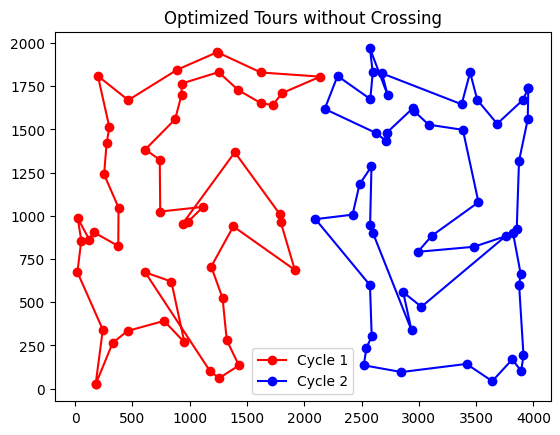

In [41]:
np.random.seed(11)

# def calculate_distance(city1, city2):
#     return np.round(np.linalg.norm(city1 - city2))

def plot_current_tours_to_file(positions, tour1, tour2,unvisited):
    # Ensure the cycles start and end at the same city to form closed loops
    cycle1 = tour1.copy()
    cycle2 = tour2.copy()
    cycle1.append(cycle1[0])
    cycle2.append(cycle2[0])

    # Plot the optimized tours
    plt.plot(positions[cycle1, 0], positions[cycle1, 1], linestyle='-', marker='o', color='r', label='Cycle 1')
    plt.plot(positions[cycle2, 0], positions[cycle2, 1], linestyle='-', marker='o', color='b', label='Cycle 2')
    plt.plot(positions[unvisited, 0], positions[unvisited, 1], linestyle=' ', marker='o', color='k', label='Unvisited')

    # Add legend and title
    plt.legend()
    plt.title('Optimized Tours without Crossing')
    #plt.savefig('results/step'+str(len(cycle1))+'.png')
    plt.show()
    plt.close()

def create_greedy_cycles(cities):
    n = cities.shape[0]
    unvisited = list(range(n))
    
    # Randomly choose the starting point for the first cycle
    tour1 = [unvisited.pop(np.random.randint(0, len(unvisited)))]
    start_city_1 = unvisited[tour1[0]]
    nearest_to_first_1 = [cities[tour1[0]][j] for j in unvisited]
    tour1.append(unvisited.pop(np.argmin(nearest_to_first_1)))

    # Choose the furthest city from the starting point as the initial point for the second cycle
    start_city_2_idx = np.argmax([cities[tour1[0]][i] for i in unvisited])
    tour2 = [unvisited.pop(start_city_2_idx)]
    start_city_2 = unvisited[start_city_2_idx]
    nearest_to_first_2 = [cities[tour2[0]][j] for j in unvisited]
    tour2.append(unvisited.pop(np.argmin(nearest_to_first_2)))

    # Add third point to both tours
    nearest_to_tour_1 = [cities[tour1[0]][j] + cities[tour1[1]][j] for j in unvisited]
    tour1.append(unvisited.pop(np.argmin(nearest_to_tour_1)))

    nearest_to_tour_2 = [cities[tour2[0]][j] + cities[tour2[1]][j] for j in unvisited]
    tour2.append(unvisited.pop(np.argmin(nearest_to_tour_2)))

    # Start adding points that are best fit for the graph
    while unvisited:
        #current_city = tour1[-1]
        positions = np.array([data['x'], data['y']]).T
        #plot_current_tours_to_file(positions, tour1, tour2, unvisited)
        # current_cycle_distance_1=[]
        # for x in range(len(tour1)-1):
        #     current_cycle_distance_1.append(calculate_distance(cities[tour1[x]], cities[tour1[x+1]]))
        # max_distance_1=np.sum(current_cycle_distance_1)

        # current_cycle_distance_2=[]
        # for x in range(len(tour2)-1):
        #     current_cycle_distance_2.append(calculate_distance(cities[tour2[x]], cities[tour2[x+1]]))
        # max_distance_2=np.sum(current_cycle_distance_2)


        regrets = []
        for point in unvisited:
            possible_fits = [cities[tour1[j]][point] + cities[tour1[j+1]][point] - cities[tour1[j+1]][j] for j in range(len(tour1)-1)]
            possible_fits.append(cities[tour1[-1]][point] + cities[tour1[0]][point] - cities[tour1[-1]][0])
            possible_fits.sort()
            regrets.append(possible_fits[1]*0.37 - possible_fits[0])
        best_point = np.argmax(regrets)
        best_point = unvisited.pop(best_point)

        """
        possible_points = []
        smallest_value = float('inf')
        best_point = -1
        for tour_point in tour1:
            nearest_points = [cities[tour_point][j] for j in unvisited]
            if min(nearest_points) < smallest_value:
                best_point = np.argmin(nearest_points)
                smallest_value = min(nearest_points)
                #print("best",unvisited[best_point],smallest_value)
        best_point = unvisited.pop(best_point)
        #print("best_point",best_point)
        """
        # Find all distances between points
        tour_distances = []
        for i in range(len(tour1)):
            if i == len(tour1) - 1:
                tour_distances.append(cities[tour1[-1]][tour1[0]])
            else:
                tour_distances.append(cities[tour1[i]][tour1[i+1]])

        # find smallest increase in distance when adding new point
        best_index = -1
        best_distance = cities[best_point][tour1[0]] + cities[best_point][tour1[-1]] - cities[tour1[0]][tour1[-1]]

        for i in range(len(tour_distances)-1):
            if(cities[best_point][tour1[i]] + cities[best_point][tour1[i+1]] - cities[tour1[i]][tour1[i+1]] < best_distance):
                best_index = i + 1
                best_distance = cities[best_point][tour1[i]] + cities[best_point][tour1[i+1]] - cities[tour1[i]][tour1[i+1]]

        # add new point to the tour with smallest increase in path
        if(best_index == -1):
            tour1.append(best_point)
        else:
            tour1.insert(best_index,best_point)
        #####
        ##### TU SKOŃCZYŁEM    
        #####
    
        if unvisited:
            """
            possible_points = []
            smallest_value = float('inf')
            best_point = -1
            for tour_point in tour2:
                nearest_points = [cities[tour_point][j] for j in unvisited]
                if min(nearest_points) < smallest_value:
                    best_point = np.argmin(nearest_points)
                    smallest_value = min(nearest_points)
                    #print("best",unvisited[best_point],smallest_value)
            best_point = unvisited.pop(best_point)
            #print("best_point",best_point)
            """
            regrets = []
            for point in unvisited:
                possible_fits = [cities[tour2[j]][point] + cities[tour2[j+1]][point] - cities[tour2[j+1]][j] for j in range(len(tour2)-1)]
                possible_fits.append(cities[tour2[-1]][point] + cities[tour2[0]][point] - cities[tour2[-1]][0])
                possible_fits.sort()
                regrets.append(possible_fits[1]*0.37 - possible_fits[0])
            best_point = np.argmax(regrets)
            best_point = unvisited.pop(best_point)

            # Find all distances between points
            tour_distances = []
            for i in range(len(tour2)):
                if i == len(tour2) - 1:
                    tour_distances.append(cities[tour2[-1]][tour2[0]])
                else:
                    tour_distances.append(cities[tour2[i]][tour2[i+1]])

            # find smallest increase in distance when adding new point
            best_index = -1
            best_distance = cities[best_point][tour2[0]] + cities[best_point][tour2[-1]] - cities[tour2[0]][tour2[-1]]

            for i in range(len(tour_distances) - 1):
                if(cities[best_point][tour2[i]] + cities[best_point][tour2[i+1]] - tour_distances[i] < best_distance):
                    best_index = i + 1
                    best_distance = cities[best_point][tour2[i]] + cities[best_point][tour2[i+1]] - tour_distances[i]

            # add new point to the tour with smallest increase in path

            if(best_index == -1):
                tour2.append(best_point)
            else:
                tour2.insert(best_index,best_point)

    return tour1, tour2

def plot_optimized_tours(positions, cycle1, cycle2):
    # Ensure the cycles start and end at the same city to form closed loops
    cycle1.append(cycle1[0])
    cycle2.append(cycle2[0])

    # Plot the optimized tours
    plt.plot(positions[cycle1, 0], positions[cycle1, 1], linestyle='-', marker='o', color='r', label='Cycle 1')
    plt.plot(positions[cycle2, 0], positions[cycle2, 1], linestyle='-', marker='o', color='b', label='Cycle 2')

    # Add legend and title
    plt.legend()
    plt.title('Optimized Tours without Crossing')
    plt.show()

# Load data from CSV file
data = pd.read_csv('kroa.csv', sep=' ')
positions = np.array([data['x'], data['y']]).T

# # Add text box with information
# N = data.shape[0]
# total_length_cycle1 = sum(calculate_distance(positions[cycle1[i-1]], positions[cycle1[i]]) for i in range(N))
# total_length_cycle2 = sum(calculate_distance(positions[cycle2[i-1]], positions[cycle2[i]]) for i in range(N))
# textstr = "N nodes: %d\nTotal length cycle 1: %.3f\nTotal length cycle 2: %.3f" % (N, total_length_cycle1, total_length_cycle2)
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# ax[1].text(0.05, 0.95, textstr, transform=ax[1].transAxes, fontsize=14, verticalalignment='top', bbox=props)

# Create two separate cycles without lines crossing
distance_matrix = pairwise_distances(positions)

cycle1, cycle2 = create_greedy_cycles(distance_matrix)

# Plot the optimized tours
plot_optimized_tours(positions, cycle1, cycle2)

## Algorytm 2-regret

[1250.2339781016992, 1286.4388831188212, 1510.6386066826176]
[2526.658267356312, 2618.4869676971853, 2670.970610096637]
[3479.7018550444805, 3529.201184404199, 3716.83104270291]
[147.1767644704829, 216.11339616044165, 417.06234545928504]
[3583.50694153088, 3661.452444044576, 3765.137978879393]
[960.0255204941169, 970.2705808175367, 1238.9983857939444]
[2685.5772191467518, 2729.886627682549, 2931.31591610321]
[993.6201487490076, 1061.0753978865027, 1216.0037006522637]
[2658.798600872206, 2704.7931529046728, 2902.3969404614522]
[1102.3905841397593, 1136.8909358421326, 1416.4042502054278]
[1800.8833943373459, 1819.138532382842, 2102.425504030999]
[2796.1205267298474, 2833.1286592740544, 3050.373091934821]
[3489.320850824699, 3578.136386444765, 3639.889284030491]
[3587.5562713356844, 3642.557892470619, 3816.032756672825]
[1893.3705395405307, 1915.4111830100605, 2198.408970141816]
[534.1956570396281, 630.8922253443927, 839.8029530788755]
[1887.345755287038, 1910.0811501085498, 2192.99338804

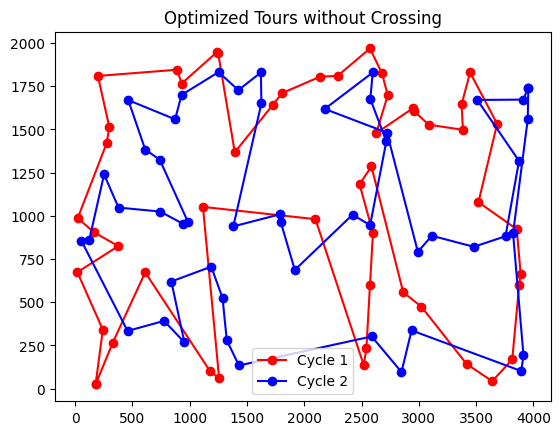

In [35]:

np.random.seed(11)

# def calculate_distance(city1, city2):
#     return np.round(np.linalg.norm(city1 - city2))

def plot_current_tours_to_file(positions, tour1, tour2, unvisited):
    # Ensure the cycles start and end at the same city to form closed loops
    cycle1 = tour1.copy()
    cycle2 = tour2.copy()
    cycle1.append(cycle1[0])
    cycle2.append(cycle2[0])

    # Plot the optimized tours
    plt.plot(positions[cycle1, 0], positions[cycle1, 1], linestyle='-', marker='o', color='r', label='Cycle 1')
    plt.plot(positions[cycle2, 0], positions[cycle2, 1], linestyle='-', marker='o', color='b', label='Cycle 2')
    plt.plot(positions[unvisited, 0], positions[unvisited, 1], linestyle=' ', marker='o', color='k', label='Unvisited')

    # Add legend and title
    plt.legend()
    plt.title('Optimized Tours without Crossing')
    plt.show()
    plt.close()

def create_2regret_cycles(cities):
    n = cities.shape[0]
    unvisited = list(range(n))
    
    # Randomly choose the starting point for the first cycle
    tour1 = [unvisited.pop(np.random.randint(0, len(unvisited)))]
    start_city_1 = unvisited[tour1[0]]
    nearest_to_first_1 = [cities[tour1[0]][j] for j in unvisited]
    tour1.append(unvisited.pop(np.argmin(nearest_to_first_1)))

    # Choose the furthest city from the starting point as the initial point for the second cycle
    start_city_2_idx = np.argmax([cities[tour1[0]][i] for i in unvisited])
    tour2 = [unvisited.pop(start_city_2_idx)]
    start_city_2 = unvisited[start_city_2_idx]
    nearest_to_first_2 = [cities[tour2[0]][j] for j in unvisited]
    tour2.append(unvisited.pop(np.argmin(nearest_to_first_2)))

    # Add third point to both tours
    nearest_to_tour_1 = [cities[tour1[0]][j] + cities[tour1[1]][j] for j in unvisited]
    tour1.append(unvisited.pop(np.argmin(nearest_to_tour_1)))

    nearest_to_tour_2 = [cities[tour2[0]][j] + cities[tour2[1]][j] for j in unvisited]
    tour2.append(unvisited.pop(np.argmin(nearest_to_tour_2)))

    # Start adding points that are best fit for the graph
    while unvisited:
        for tour in [tour1, tour2]:
            regrets = []
            for city in unvisited:
                distances = [cities[city][point] for point in tour]
                distances.sort()
                regret = distances[1] - distances[0]
                regrets.append((regret, city))
            regrets.sort(reverse=True)
            best_city = regrets[0][1]
            tour_distances = [cities[tour[i]][tour[i+1]] for i in range(len(tour)-1)]
            best_increase = float('inf')
            best_index = -1
            for i in range(len(tour_distances)):
                increase = cities[best_city][tour[i]] + cities[best_city][tour[i+1]] - tour_distances[i]
                if increase < best_increase:
                    best_increase = increase
                    best_index = i + 1
            tour.insert(best_index, best_city)
            unvisited.remove(best_city)

    return tour1, tour2

def plot_optimized_tours(positions, cycle1, cycle2):
    # Ensure the cycles start and end at the same city to form closed loops
    cycle1.append(cycle1[0])
    cycle2.append(cycle2[0])

    # Plot the optimized tours
    plt.plot(positions[cycle1, 0], positions[cycle1, 1], linestyle='-', marker='o', color='r', label='Cycle 1')
    plt.plot(positions[cycle2, 0], positions[cycle2, 1], linestyle='-', marker='o', color='b', label='Cycle 2')

    # Add legend and title
    plt.legend()
    plt.title('Optimized Tours without Crossing')
    plt.show()

# Load data from CSV file
data = pd.read_csv('kroa.csv', sep=' ')
positions = np.array([data['x'], data['y']]).T

# Create two separate cycles without lines crossing
distance_matrix = pairwise_distances(positions)

cycle1, cycle2 = create_2regret_cycles(distance_matrix)

# Plot the optimized tours
plot_optimized_tours(positions, cycle1, cycle2)
